Epoch  1/1: 100%|██████████| 72/72 [00:01<00:00, 54.96batches/s]


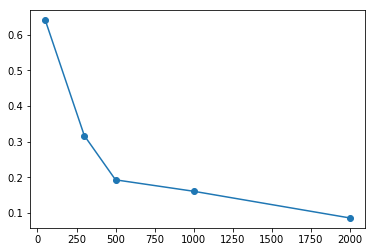

In [4]:
epochs = 1
#batch_size = 2000
learning_rate = 0.01

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

avg_valid_reads = []
batch_num = [50, 300, 500, 1000, 2000]

for batch_size in batch_num:
    valid_readings=[]
    num_readings=2
    
    for i in range (num_readings):

        # The accuracy measured against the validation set
        validation_accuracy = 0.0

        with tf.Session() as session:
            session.run(init)
            batch_count = int(math.ceil(len(train_features)/batch_size))

            for epoch_i in range(epochs):

                # Progress bar
                batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')

                # The training cycle
                for batch_i in batches_pbar:
                    # Get a batch of training features and labels
                    batch_start = batch_i*batch_size
                    batch_features = train_features[batch_start:batch_start + batch_size]
                    batch_labels = train_labels[batch_start:batch_start + batch_size]

                    # Run optimizer and get loss
                    _, l = session.run(
                        [optimizer, loss],
                        feed_dict={features: batch_features, labels: batch_labels})

                # Check accuracy against Validation data
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

        valid_readings.append(validation_accuracy)    
    mean = sum(valid_readings) / len(valid_readings)
    avg_valid_reads.append(mean)

plt.plot(batch_num,avg_valid_reads,'o-')